<a href="https://colab.research.google.com/github/shintafiaa/Kampus-Merdeka-ML-Terapan/blob/main/4_Predictive_Analytics_of_House_Price(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediksi Analitik Penjualan Rumah di King County, Washington State, USA
Dataset ini berisi data riwayat penjualan rumah di King Country, Washington State, USA, pada bulan Mei 2014 hingga Mei 2015.

**Impor *Library***

*Library* numpy digunakan untuk memproses larik atau array.

*Library* matplotlib digunakan membuat visualisasi data dalam dua dimensi.

*Library* seaborn dibangun di atas *library* matplotlib, digunakan untuk membuat visualisasi data.

*Library* pandas digunakan untuk menganalisis dan memanipulasi data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# DATA UNDERSTANDING DAN DATA PREPARATION

**Memuat Dataset (Data Loading)**

Memuat dataset dengan nama file 'kc_house_data.csv' dengan format file csv (comma separated value)

In [4]:
house = pd.read_csv('kc_house_data.csv')

**Menampilkan Dataframe**

In [5]:
house

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

Terdapat 21613 data yang terdiri dari 21 atribut.

id: notasi rumah

date: tanggal rumah terjual

price: harga penjualan rumah, fitur target

bedrooms: jumlah kamar tidur pada rumah

bathrooms: jumlah kamar mandi pada rumah, nilai .5 merupakan toilet

sqft_living: luas *living area* dalam satuan *square feet*

sqft_lot: luas tanah dalam satuan *square feet*

floors: jumlah tingkat/lantai rumah

waterfront: rumah dengan view menghadap pantai

view: Indeks seberapa bagus pemandangan rumah tersebut

condition: kondisinya secara keseluruhan

grade: nilai keseluruhan yang diberikan kepada *housing-unit,* berdasarkan sistem penilaian King County

sqft_above: luas rumah yang berada di atas permukaan tanah dalam satuan *square feet*

sqft_basement: luas ruang-bawah-tanah dalam satuan *square feet*

yr_built: tahun pertama kali dibangun

yr_renovated: tahun terakhir rumah direnovasi

zipcode: kode pos

lat: koordinat garis lintang

long: koordinat garis bujur

sqft_living15: Luas *living area* untuk *nearest 15 neighbors*

sqft_lot15: Luar area tanah untuk *nearest 15 neighbors*

**Anomali Data pada Atribut floors**

Terdapat anomali data pada atribut floors. Anomali tersebut berupa nilai pecahan yang ada pada atribut tersebut seperti 3.50, dan tipe data floors berupa float. Sedangkan, banyaknya lantai pada suatu bangunan pasti bernilai bilangan bulat. 

**Anomali Data pada Atribut bathrooms**

Dari peninjauan sekilas dataset di atas, didapatkan nilai dari fitur 'bathrooms' yaitu 0.75, 1.00, 2.00, 2.25, 2.50, 3. Anomali terjadi pada banyaknya kamar mandi yang bernilai pecahan. Meski pada keterangan fitur-fitur dijelasakan bahwa nilai .5 pada fitur bathrooms menunjukkan toilet bukan kamar mandi, namun nilai 'bathrooms' yang berkelipatan .25 seperti .25 dan .75 belum diketahui apa maksud dari nilai tersebut.

**Anomali Kualitas Data pada Atribut id**

In [6]:
print(house.nunique(axis=0))

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


Dari hasil keluaran cek nilai unik pada data didapatkan bahwa atribut id memiliki nilai unik sebanyak 21436. Sedangkan total data pada dataset berjumlah 21613. Hal ini menunjukkan ketidakwajaran. Karena, nilai dari id harus unik untuk setiap data.

**Mengecek Informasi pada Dataset**

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Terdapat enam atribut bertipe data float, empat belas atribut bertipe data integer, satu atribut bertipe data objetct.

**Anomali pada Tipe Data**

Ditemukan Anomali pada tipe data beberapa atribut. 
- Atribut bathrooms dan floors seharusnya bertipe data integer. Hal ini selaras dengan anomali nilai bathrooms dan floors yang sebelumnya telah dibahas, dan belum diketahui alasan terdapatnya nilai pecahan pada atribut bathrooms, dan floors.
- Atribut yang menjelaskan mengenai luas suatu daerah seharusnya bertipe data float. Meskipun seluruh data memiliki nilai dengan bilangan bulat, seharusnya atribut yang berkaitan dengan ukuran luas bertipe data float. Hal ini dikarenakan ukuran luas bersifat kontinu. Dan pada kasus dataset ini yang terdiri dari lebih dari 20.000 data, sulit dipercaya bahwa luas dari masing-masing daerah bernilai bulat dalam satuan square-feet. Atribut-atribut yang dimaksud antara lain: sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15.

**Mengubah Atribut 'date' Menjadi 'month' dan 'year'**

In [8]:
house['date'] = pd.to_datetime(house['date'])

In [9]:
house['month'] = house['date'].apply(lambda date: date.month)
house['year'] = house['date'].apply(lambda date: date.year)

**Menghapus Atribut 'id' dan 'date'**

Atribut 'id' tidak digunakan dalam prediksi. Atribut 'date' sudah digantikan dengan atribut 'month' dan 'year'.

In [10]:
house.drop('id',inplace=True,axis=1)
house.drop('date',inplace=True,axis=1)

**Melihat Keberadaan Data 'null' *(missing value)* pada Dataset**

In [11]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

Tidak ditemukan data yang bernilai null pada tiap-tiap atribut.

**Melihat Deskripsi Statistika Dataset**

In [12]:
house.describe()

price      bedrooms  ...         month          year
count  2.161300e+04  21613.000000  ...  21613.000000  21613.000000
mean   5.400881e+05      3.370842  ...      6.574423   2014.322954
std    3.671272e+05      0.930062  ...      3.115308      0.467616
min    7.500000e+04      0.000000  ...      1.000000   2014.000000
25%    3.219500e+05      3.000000  ...      4.000000   2014.000000
50%    4.500000e+05      3.000000  ...      6.000000   2014.000000
75%    6.450000e+05      4.000000  ...      9.000000   2015.000000
max    7.700000e+06     33.000000  ...     12.000000   2015.000000

[8 rows x 21 columns]

Terdapat anomali data ditunjukkan pada nilai minimum variabel bathrooms, dan bedrooms. Tidak sewajarnya rumah pada tahun 2014-2015 di daerah Washington, USA, tidak memiliki kamar tidur atau kamar mandi.

**Cek Nilai 0 pada Atribut 'bedrooms' dan 'bathrooms'**

In [13]:
bedrooms = (house.bedrooms == 0).sum()
bathrooms = (house.bathrooms == 0).sum()

print("Nilai 0 di kolom bedrooms ada: ", bedrooms)
print("Nilai 0 di kolom y bathrooms: ", bathrooms)

Nilai 0 di kolom bedrooms ada:  13
Nilai 0 di kolom y bathrooms:  10


**Cek apakah tiga belas nilai 0 pada atribut bedrooms terdapat pada baris yang sama pada empat belas nilai 0 milik atribut bathrooms?**

Pengecekkan menggunakan atribut bathrooms dengan nilai 0 lebih banyak dari nilai bedrooms.

In [14]:
house.loc[(house['bathrooms']==0)]

price  bedrooms  bathrooms  ...  sqft_lot15  month  year
875    1095000.0         0        0.0  ...        4000      6  2014
1149     75000.0         1        0.0  ...       42882      2  2015
3119    380000.0         0        0.0  ...        1399      2  2015
5832    280000.0         1        0.0  ...       22549     11  2014
6994   1295650.0         0        0.0  ...       35061      6  2014
9773    355000.0         0        0.0  ...        8050      4  2015
9854    235000.0         0        0.0  ...        7200     12  2014
10481   484000.0         1        0.0  ...       19290      9  2014
14423   139950.0         0        0.0  ...        9600      4  2015
19452   142000.0         0        0.0  ...       22850      9  2014

[10 rows x 21 columns]

Nilai 0 pada baris data atribut bedrooms berbeda dengan baris data nilai 0 milik atribut bathrooms.

Sehingga, kita perlu hapus baris yang memiliki nilai 0 untuk masing-masing variabel bedrooms dan bathrooms. 

**Menghapus Nilai 0 pada Variabel 'bedrooms' dan 'bathrooms'**

In [15]:
house = house.loc[(house[['bedrooms','bathrooms']]!=0).all(axis=1)]

**Cek Ukuran Data Saat Ini**

In [16]:
house.shape

(21597, 21)

**Univariate EDA**

**Analisis Fitur Numerik dengan data fitur tunggal**

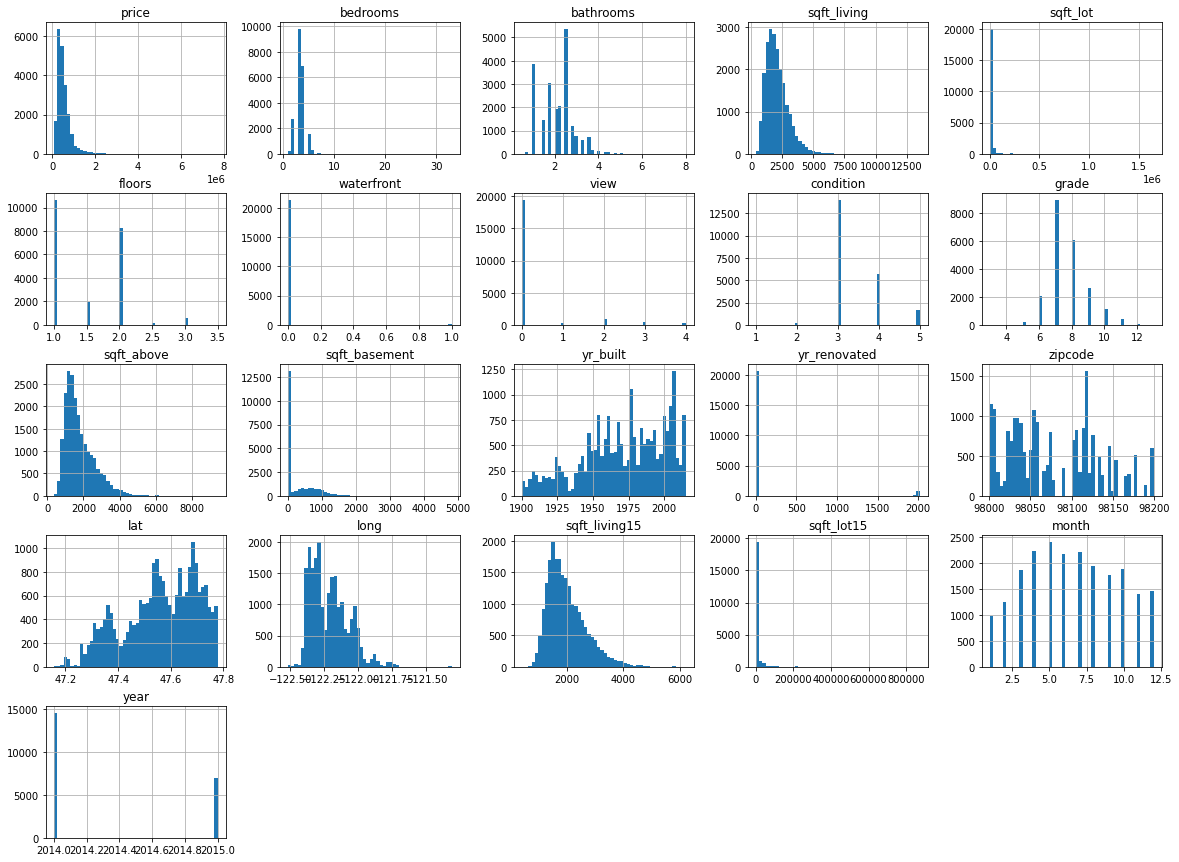

In [17]:
house.hist(bins=50, figsize=(20,15))
plt.show()

Informasi dari histogram di atas:

1. Peningkatan harga rumah sebanding dengan penurunan jumlah sampel. Distribusi harga rumah miring ke kanan (right-skewed).
2. Lebih dari 50% rumah memiliki satu hingga lima kamar tidur.
3. Sebagian besar rumah memiliki dua kamar mandi.
4. Sebagian besar rumah memiliki luas rumah 2000 *square feet.*
5. Sebagian besar rumah memiliki luas tanah atau *lot* sekitar satu *square feet.*
6. Sebagian besar rumah memiliki satu atau dua tingkat/lantai.
7. Sebagian besar rumah tidak memiliki *waterfront*.
8.  Sebagian besar rumah tidak memiliki *view*.
9. Sebagian besar rumah memiliki nilai *condition* sebesar tiga poin.
10. Sebagian besar rumah meiliki nilai *grade* sebesar tujuh hingga delapan poin.
11. Sebagian besar rumah memiliki luas *above* atau *footage of house apart from basement* sebesar ratusan hingga 6100 *square feet.*
12. Sebagian besar rumah tidak memiliki *basement*.
13. Rumah dibangun di antara rentang tahun 1900 hingga 2015.
14. Sebagian besar rumah tidak mengalami renovasi.
15. Data *zipcode* rumah berada pada rentang nilai 98000 hingga 98200.
16. Data *latitude* menggambarkan *left-skewed*.
17. Data *longitude* menggambarkan *right-skewed*.
18. Data variabel sqft_living15 menggambarkan *right-skewed*.
19. Sebagian besar rumah tidak merenovasi luas *lot* atau tanah, sehingga data sqft_lot15 terbanyak berada pada nilai 0.
20. Penjualan terbanyak berada pada bulan Mei.
21. Penjualan pada tahun 2014 lebih banyak daripada penjualan di tahun 2015.

**Multivariate EDA**

**Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'**

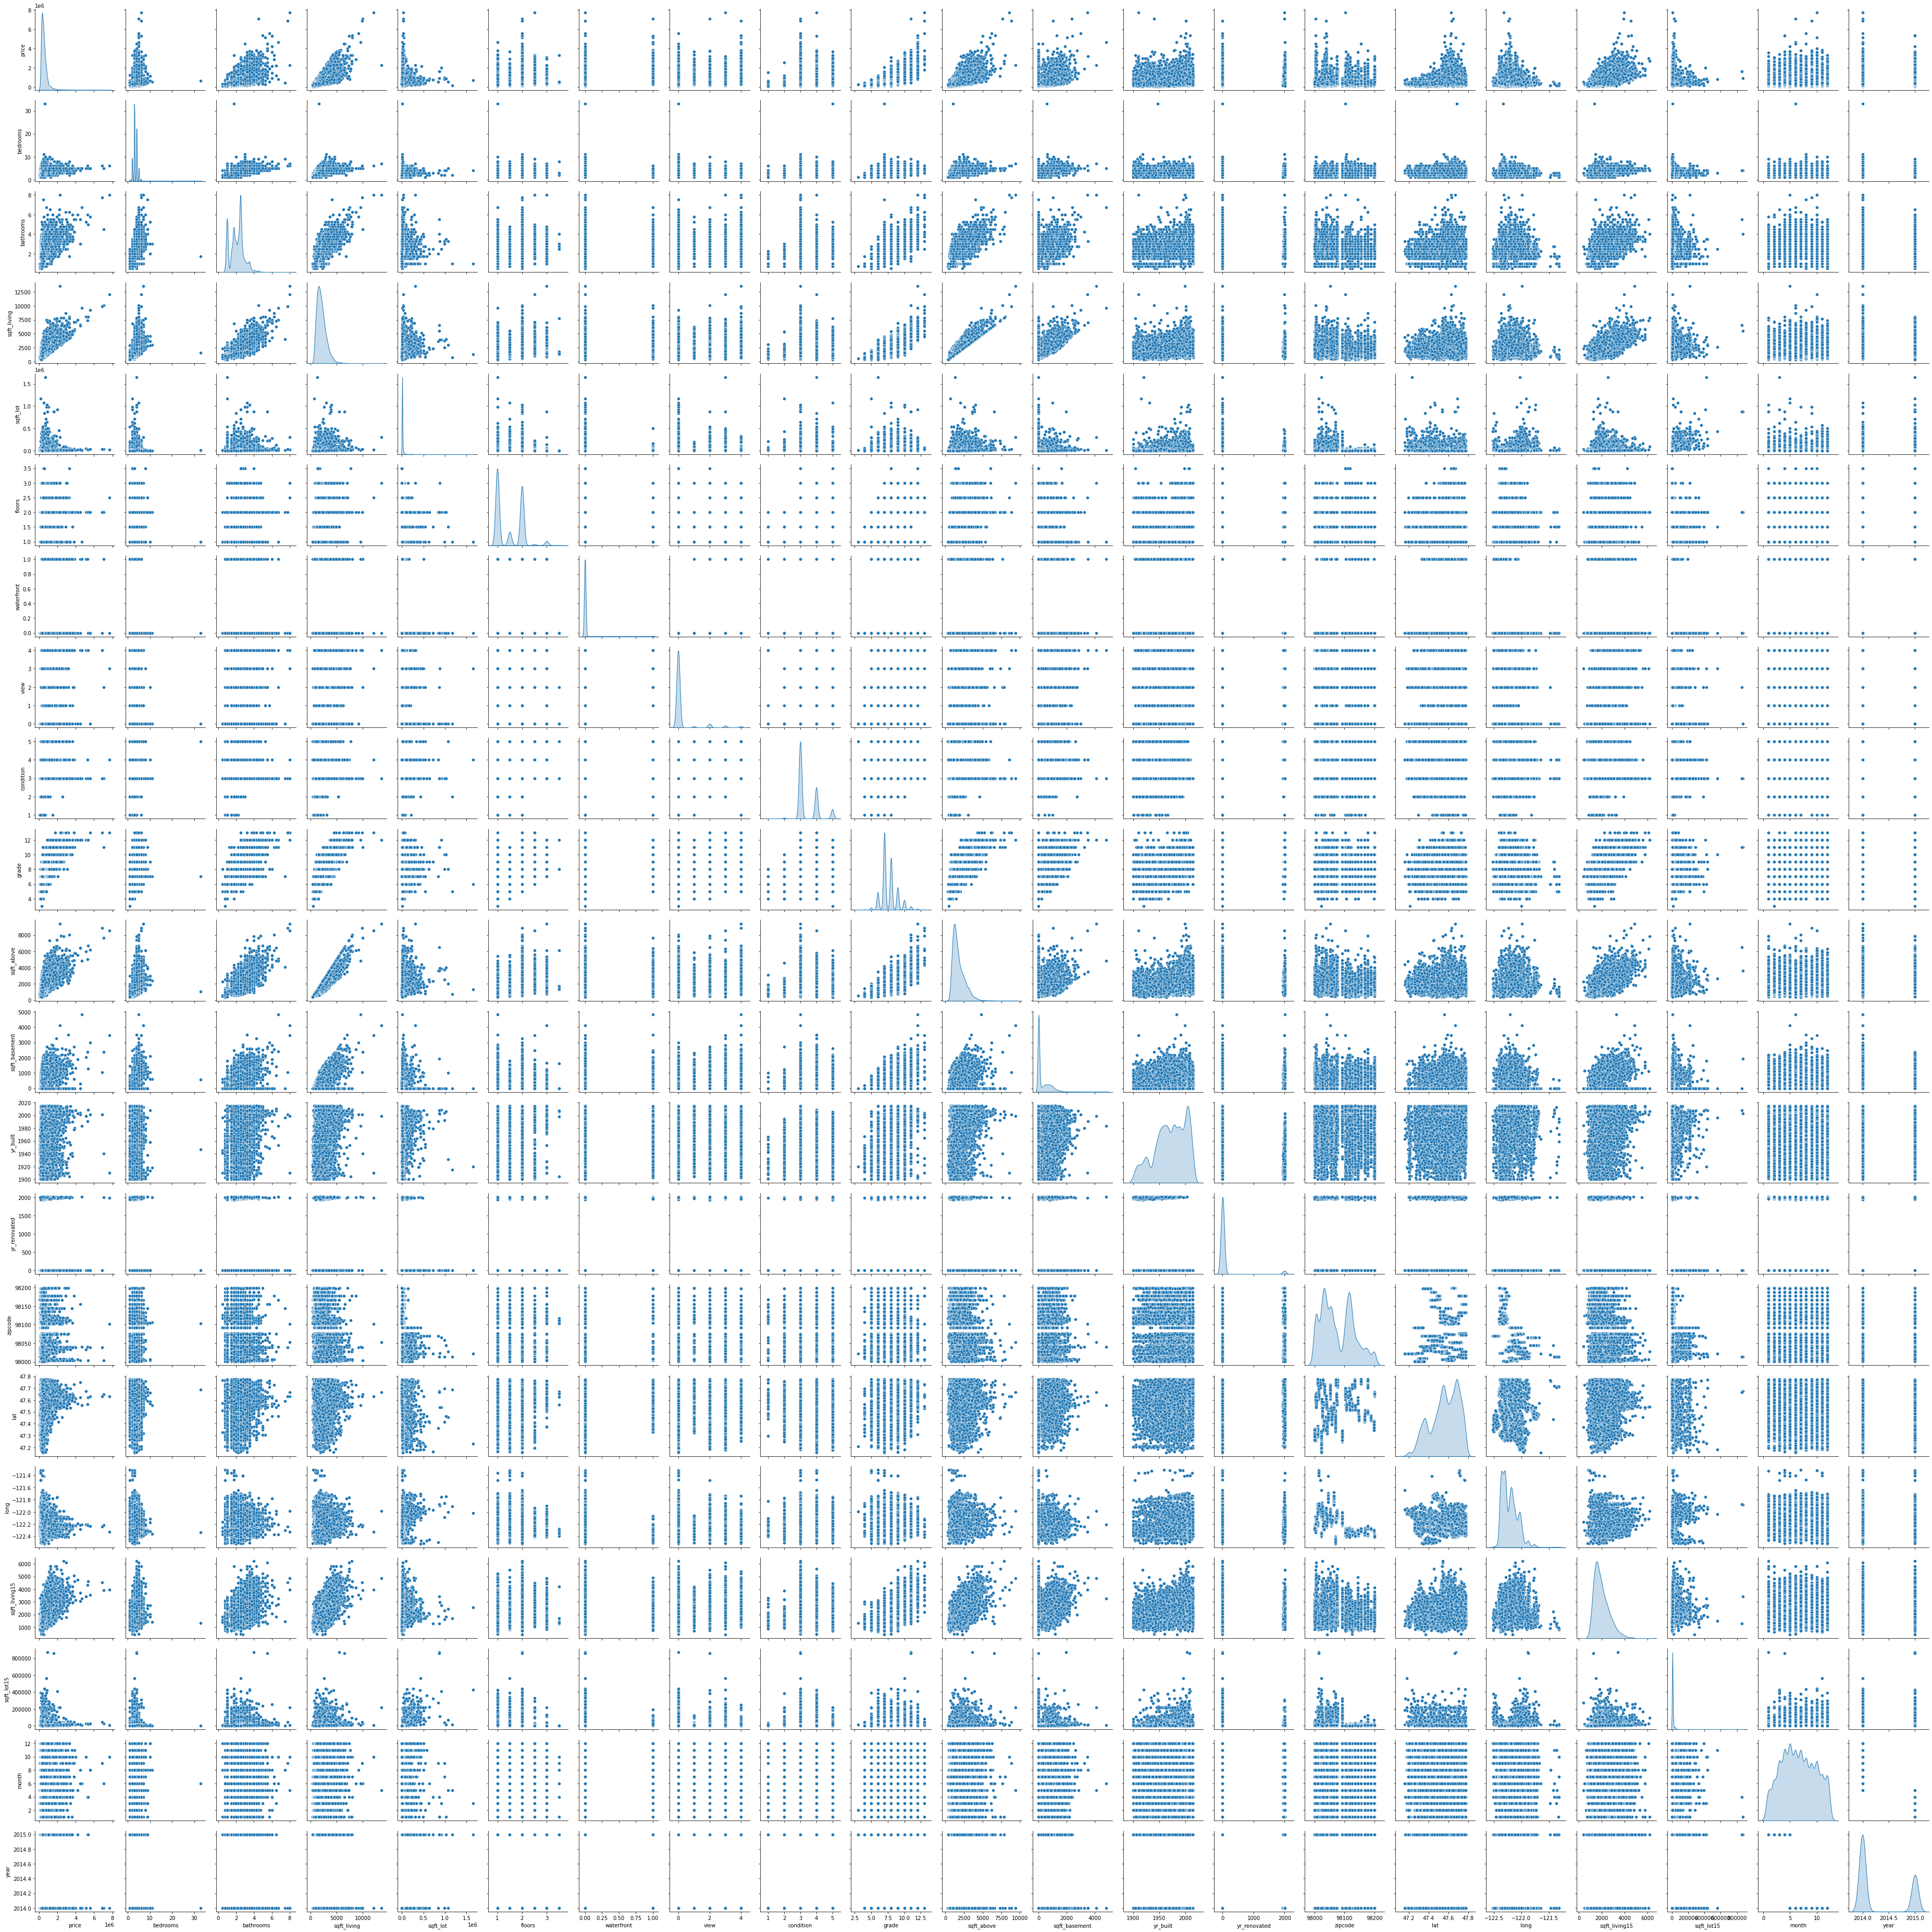

In [18]:
sns.pairplot(house, diag_kind = 'kde')

Keterkaitan antara tiap atribut dengan atribut *price* terlihat pada baris pertama visualisasi data. 

Jika nilai pada sumbu x semakin besar dan nilai pada sumbu y semakin besar, maka kedua variabel tersebut memiliki hubungan positif. 

Jika nilai pada sumbu x semakin besar, namun nilai pada sumbu y semakin kecil, maka kedua variabel tersebut memiliki hubungan negatif.

Jika hasil visualisasi tidak membentuk pola maka, kedua variabel tersebut tidak berhubungan.

Dari grafik di atas, fitur-fitur yang memiliki hubungan positif terhadap target (price) adalah bathrooms, sqft_living, grade, sqft_above,sqft_living15.

**Evaluasai Skor Korelasi dengan Fungsi 'corr()'**

Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

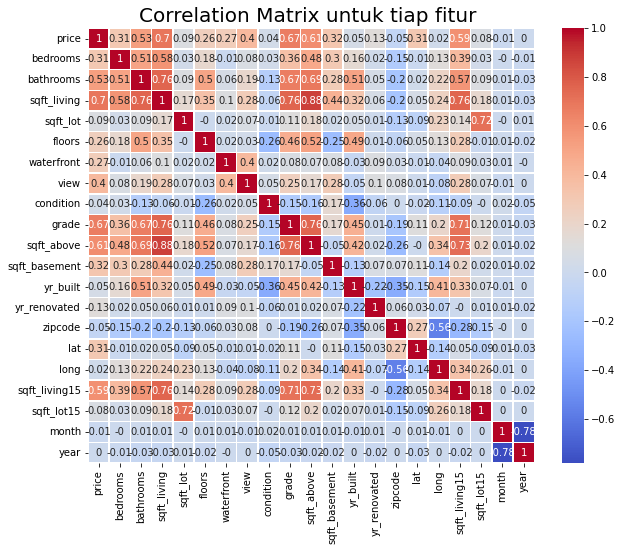

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

Keterangan matriks:

1. Korelasi tiap fitur terhadap fitur 'price' tertera pada baris pertama.

2. Koefisien korelasi mendekati 1 atau -1, menunjukkan kuatnya hubungan antara dua variabel (menggambarkan korelasi positif atau negatif).

3. Semakin mendekati 0 nilai koefisien korelasi, maka semakin kecil hubungan antara dua variabel tersebut. 

4. Semakin pekat warna merah pada persegi menunjukkan semakin kuat korelasi positif antara dua fitur.

5. Semakin pekat warna biru pada persegi menunjukkan semakin kuat korelasi negatif antara dua fitur.

6. Semakin terang warna biru, semakin menunjukkan korelasi yang lemah antara dua fitur.

7. Berikut adalah daftar fitur yang memiliki hubungan kuat dengan fitur 'price' atau memiliki warna berupa oranye atau mendekati warna merah atau memiliki nilai korelasi lebih dari 0,5: bathrooms (0,53), sqft_living (0,7), grade (0,67), sqft_above (0,61), sqft_living15 (0,59).

**Inisialisasi atribut dan target**

Menginisialisasikan variabel X yang merupakan fitur-fitur untuk memprediksi harga suatu rumah, dan variabel y yang merupakan fitur target atau nilai yang akan diprediksi. Tidak mengikutsertakan fitur-fitur yang memiliki pengaruh/korelasi lemah dengan fitur 'price'.

In [20]:
X = house[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']]
y = house['price']

**Split Dataset**

Split dataset menjadi data latih dan data uji sebelum transformasi. Hal ini ditujukan supaya transformasi diterapkan hanya pada data latih.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

**Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.**

In [22]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 21597
Total # sampel di seluruh dataset: 19437
Total # sampel di seluruh datasett: 2160


**Normalisasi Data dengan StandardScaler** 

Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

**Standarisasi Data Latih**

In [23]:
numerical_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

bathrooms  sqft_living     grade  sqft_above  sqft_living15
2052   -0.476885    -0.393168  0.290273   -0.083766      -0.477134
13755   0.172652     0.280744 -0.561997   -0.698130      -0.026114
10971   0.497420    -0.273603  0.290273   -0.324693       0.163023
15891  -1.451189    -1.164907 -1.414267   -0.939056      -0.869958
14118   0.172652     0.226396  0.290273    0.602876       1.108710

In [24]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

bathrooms  sqft_living       grade  sqft_above  sqft_living15
count  19437.0000   19437.0000  19437.0000  19437.0000     19437.0000
mean      -0.0000       0.0000      0.0000      0.0000         0.0000
std        1.0000       1.0000      1.0000      1.0000         1.0000
min       -2.1007      -1.8497     -3.9711     -1.6980        -2.3118
25%       -0.4769      -0.7084     -0.5620     -0.7222        -0.7245
50%        0.1727      -0.1866     -0.5620     -0.2765        -0.2153
75%        0.4974       0.5090      0.2903      0.5065         0.5558
max        7.6423      12.4546      4.5516      9.1799         6.1427

Standarisasi mengubah nilai 'mean' menjadi 0 dan nilai 'std' menjadi 1

**Standarisasi Data Uji**

In [25]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#Pengembangan Model

Pada tahap ini terdapat beberapa fungsi dengan penjelasan sebagai berikut:

Fungsi fit() digunakan untuk melatih model. Parameter X_train merupakan data latih dengan atribut-atribut yang digunakan untuk prediksi. Sedangkan y_train adalah data latih dengan atribut target.

Fungsi score() dengan parameter X_train, dan y_train digunakan untu mengukur keakuratan model terhadap data pelatihan.

**Decision Tree**

random_state adalah *hyperparameter* untuk mengatur jumlah pohon pada algoritma yang bekerja.

In [26]:
dtr = DecisionTreeRegressor(random_state=42)

In [27]:
dtr.fit(X_train,y_train)
score_dtr = dtr.score(X_train,y_train)
print(score_dtr)

0.9942582610647696


**Random Forest Regressor**

In [28]:
rfr = RandomForestRegressor(n_estimators=500)

In [29]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.9413405968263935


**KNN**

n_neighbors adalah hyperparameter untuk menentukan jumlah tetangga terdekat untuk perhitungan algoritma KNN.

In [30]:
knr = KNeighborsRegressor(n_neighbors = 2)

In [31]:
knr.fit(X_train,y_train)
score_knr = knr.score(X_train,y_train)
print(score_knr)

0.8256113362229394


#EVALUASI MODEL

**Nilai RMSE untuk Masing-masing Model pada Proses Latihan Maupun Pengujian**

*   Fungsi predict() digunakan untuk memprediksi hasil observasi data uji.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.





In [32]:
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR','RFR','KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 )
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)
 
rmse

train     test
DTR  883.474  9515.05
RFR  2823.84  7029.86
KNR   4868.9  7915.34

**Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian**

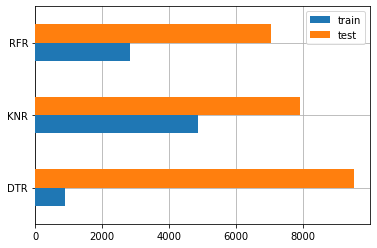

In [33]:
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari hasil di atas, terlihat bahwa model RFR memiliki hasil yang paling baik dibandingkan DTR dan KNR. Hal ini ditunjukkan pada nilai error dari hasil uji RFR memiliki nilai terkecil, dan tidak mengalami overfitting sebagaimana model DTR. 

**Uji model dengan data test**

In [34]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict) 

y_true  prediksi_DTR  prediksi_RFR  prediksi_KNR
21585  270000.0      292500.0      291991.3      284500.0

Pada pengujian kali ini didapatkan hasil prediksi yang mendekati nilai sesungguhnya diperoleh oleh model KNR.